In [210]:
# 0.0 Imports

import os
import pandas  as pd
import numpy   as np
import seaborn as sns
import datetime

from matplotlib import pyplot as plt
from IPython.display import Image

pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set()

# 1 - Business Questions 

O CEO da KC House fez uma reunião e na mesma foram discutidas métricas da empresa. Das requisições do CEO estão:
1 - Qual imóvel deve ser comprado e por qual valor?
2 - Uma vez comprado, qual o melhor momento para vender?

### 1.2 Understanding Business Questions
A KC é uma empresa de venda de imóveis onde seu lucro está na arbitragem da compra, ou seja, em comprar imóveis por um valor x e vendê-lo posteriormente por um valor maior. No entanto o CEO se encontra no questionamento de, dado um portfólio de imóveis, desdes qual devem ser comprados e uma vez comprado quando deve ser realizada a venda a fim de garantir o lucro. 


### 1.3 Assumptions

Boa compra é comprar abaixo da mediana
Boa venda é vender em período ruim lucrando 10% e em período bom lucrando 30%
    Período ruim é x e bom é y
As hipoteses são a respeito do que é um boa compra e uma má compra

# 2 - Data Collect




In [173]:
data = pd.read_csv('kc_house.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# 3 - Data Cleaning and Description


### 3.1 Data Dimensions


In [174]:
print(f'O número de linhas do banco de dados é {data.shape[0]}')
print(f'O número de colunas do banco de dados é {data.shape[1]}')


O número de linhas do banco de dados é 21613
O número de colunas do banco de dados é 21


### 3.2 Data Types

In [175]:
data.dtypes

#'date' as datetime
data['date'] = pd.to_datetime(data['date'])

#'yr_built' as datetime
data['yr_built'] = pd.to_datetime(data['yr_built'].astype(str))

#'yr_renovated' as datetime
data['yr_renovated'] = pd.to_datetime(data['yr_renovated'].astype(str).replace('0','1800'))



### 3.3 Check NA

In [176]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 3.4 Descriptive Statistical


#### 3.4.1 Numerical Variables

In [257]:
df = dados.select_dtypes(include=['int64', 'float64'])

df_min = pd.DataFrame(df.apply(min)).T
df_max = pd.DataFrame(df.apply(max)).T
df_range = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
df_mean = pd.DataFrame(df.apply(np.mean)).T
df_median = pd.DataFrame(df.apply(np.median)).T
df_std = pd.DataFrame(df.apply(np.std)).T
df_skew = pd.DataFrame(df.apply(lambda x:x.skew())).T
df_kurtosis = pd.DataFrame(df.apply(lambda x:x.kurtosis())).T

summary = pd.concat([df_min,df_max,df_range,df_mean,df_median,df_std,df_skew,df_kurtosis]).T
summary.columns = ['Min','Max','Range','Mean','Median','Standard Deviation','Skewness','Kurtosis']
summary

,Min,Max,Range,Mean,Median,Standard Deviation,Skewness,Kurtosis
id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


#### 3.4.2 DateTime Variables


In [178]:
summary_date = data.select_dtypes(exclude=['int64','float64'])
pd.DataFrame.describe(summary_date,datetime_is_numeric=True)

,date,yr_built,yr_renovated
count,21613,21613,21613
mean,2014-10-29 04:38:01.959931648,1971-01-03 00:06:59.747374252,1808-04-13 17:09:46.813491200
min,2014-05-02 00:00:00,1900-01-01 00:00:00,1800-01-01 00:00:00
25%,2014-07-22 00:00:00,1951-01-01 00:00:00,1800-01-01 00:00:00
50%,2014-10-16 00:00:00,1975-01-01 00:00:00,1800-01-01 00:00:00
75%,2015-02-17 00:00:00,1997-01-01 00:00:00,1800-01-01 00:00:00
max,2015-05-27 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00


# 4.0 Hypothesis and Feature Engineering

### 4.1 Hypothesis - MindMap

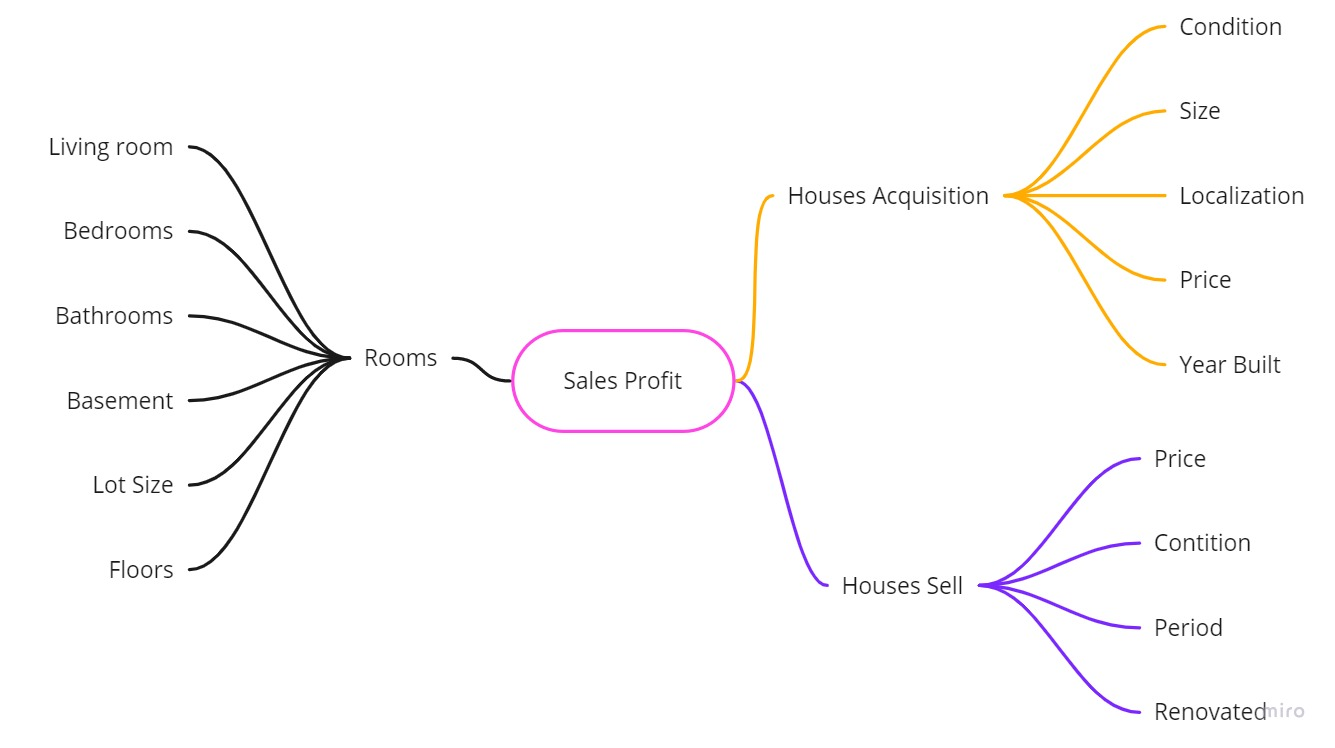

In [300]:
df4 = data.copy()
Image( 'mindmap.jpg' )

### 4.2 Hypothesis - Hypothesis Criation

1 - Casas em melhores condições possuem preços acima da mediana

2 - Casas construídas há mais tempo possuem preços abaixo da mediana

3 - Casas localizadas com vista para água possuem preço acima da mediana

4 - No primeiro semestre do ano o preço da casa é maior que a mediana

5 - Casas que passaram por reforma e estão em boas condições possuem preços maiores que a mediana

6 - Casas que possuem a partir de 3 quartos e 2 banheiros tem preço acima da mediana 

7 - Casas com o tamanho do lot maior que a mediana possuem preço acida da mediana

8 - Casas com tamanho da sala de estar maior que a mediana possuem preço maior que a mediana

9 - Casas que possuem porão possuem preço maior que a mediana

10 - Casas com número de andares a partir de 2 são mais caras que a mediana




# 5.0 Exploratory Data Analysis


### 5.1 Hypothesis Analysis
1 - Casas em melhores condições possuem preços acima da mediana

In [301]:
df4['condition'] = df4['condition'].apply(lambda x: 'bad' if x <= 2 else 'regular' 
                                                           if 3 <= x <= 4 else 'good' 
                                                           if x == 5 else 'NA')




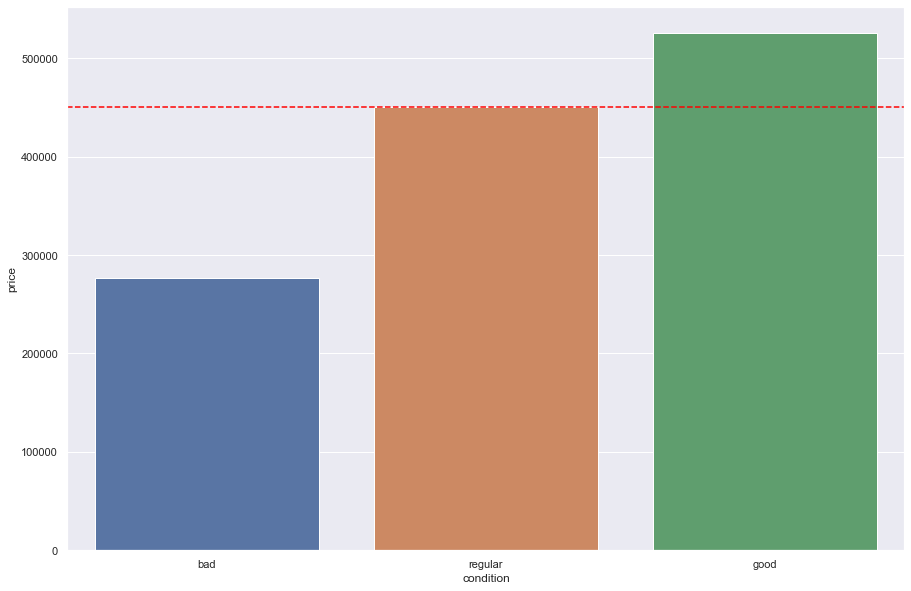

In [432]:
h_1 = df4[['condition','price']].groupby('condition').median().sort_values('price').reset_index()
sns.barplot(x='condition',y='price',data=h_1);
plt.axhline( np.median(df4['price']), linestyle='--', color ='red');



2 - Casas construídas há mais tempo possuem preços abaixo da mediana

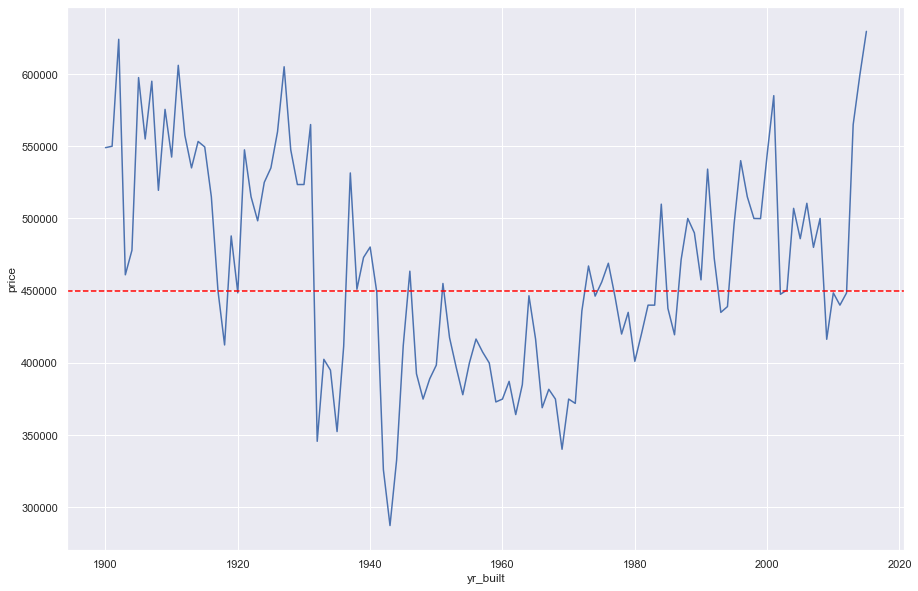

In [333]:
h_2 = df4[['yr_built','price']].groupby('yr_built').median().reset_index()
sns.lineplot(x='yr_built',y='price',data=h_2);
plt.axhline( np.median(df4['price']), linestyle='--', color ='red');


3 - Casas localizadas com vista para água possuem preço acima da mediana

posx and posy should be finite values
posx and posy should be finite values


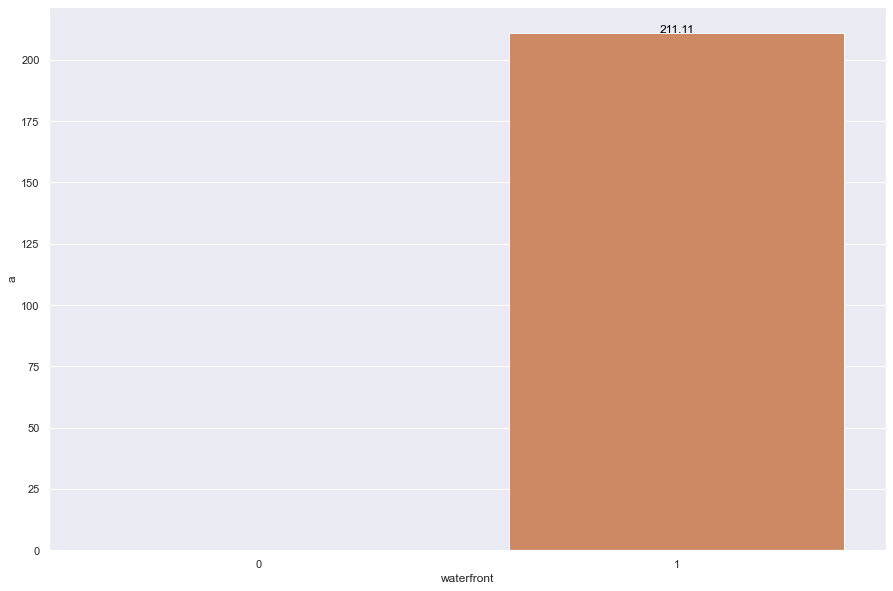

In [433]:
h_3 =  df4[['waterfront','price']].groupby('waterfront').median().reset_index()
# sns.barplot(x='waterfront',y='price',data=h_3)
h_3['a'] = 100 * h_3['price'].pct_change()

a = sns.barplot(x='waterfront',y='a',data=h_3)

for index, row in aux.iterrows():
    a.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")


4 - No primeiro semestre do ano o preço da casa é maior que a mediana

In [ ]:


5 - Casas que passaram por reforma e estão em boas condições possuem preços maiores que a mediana

6 - Casas que possuem a partir de 3 quartos e 2 banheiros tem preço acima da mediana 

7 - Casas com o tamanho do lot maior que a mediana possuem preço acida da mediana

8 - Casas com tamanho da sala de estar maior que a mediana possuem preço maior que a mediana

9 - Casas que possuem porão possuem preço maior que a mediana

10 - Casas com número de andares a partir de 2 são mais caras que a mediana


